In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import readNetwork as rn

#matplotlib関連
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
dir_name = '_sampleData'
net_name = 'GridNet_25'

# Assume you have not changed the relative paths after cloning the repository
root = os.path.dirname(os.path.abspath('.'))
root = os.path.join(root, '..', dir_name, net_name)
root


'c:\\Users\\tsuba\\Documents\\master_thesis\\TNPandMS_experCode\\TNPandMS_lib\\..\\_sampleData\\GridNet_25'

In [30]:
df = rn.read_node(os.path.join(root, 'netname_node.tntp'.replace('netname', net_name)))
df


,X,Y
Node,,
1,0,0
2,1,0
3,2,0
4,3,0
5,4,0
6,0,-1
7,1,-1
8,2,-1
9,3,-1


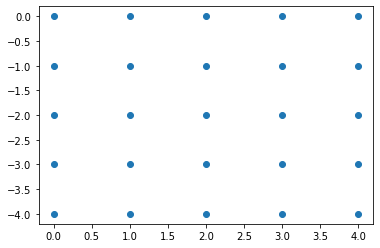

In [31]:
plt.figure()
plt.scatter(df['X'], df['Y'])

In [32]:
net = rn.read_net(os.path.join(root, 'netname_net.tntp'.replace('netname', net_name)))

In [33]:
# networkX のグラフの作り方
G = nx.DiGraph()
for i in range(net.shape[0]):
    G.add_edge(net['init_node'][i], net['term_node'][i])

# print(G.nodes)

In [34]:
# 座標リストの作成
try:
    pos = {i: [df['X'][i], df['Y'][i]] for i in df.index}  # 元データが大文字か
except KeyError:
    pos = {i: (df['x'][i], df['y'][i]) for i in df.index}  # 小文字か

# pos


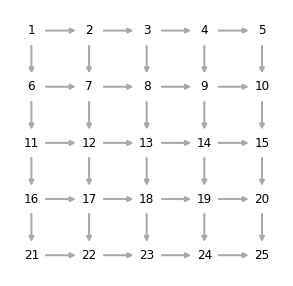

In [37]:
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure(figsize = (5, 5))
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=10, edge_color="darkgray", node_color="w", width=2, node_size=700, font_size=12)
plt.axis('off')
plt.show()


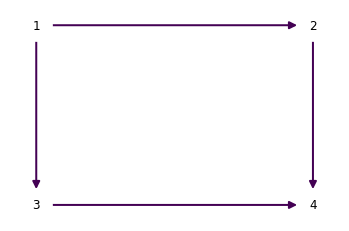

In [20]:
color = net['free_flow_time']
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure()
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=15, edge_color=color, node_color="w", width=2, node_size=1000, font_size=12)
plt.axis('off')
plt.show()
